In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import time
plt.rc('text', usetex=True)
plt.rc('font', family='Serif')

import matplotlib as mpl 
mpl.rcParams['figure.figsize'] = [10, 7]
mpl.rcParams['font.size'] = 27

mpl.rcParams['savefig.dpi'] = 150 
mpl.rcParams['xtick.minor.visible'] = True
mpl.rcParams['ytick.minor.visible'] = True
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['xtick.major.size'] = 10 
mpl.rcParams['xtick.minor.size'] = 5 

mpl.rcParams['ytick.major.size'] = 10 
mpl.rcParams['ytick.minor.size'] = 5 

mpl.rcParams['xtick.labelsize'] = 23
mpl.rcParams['ytick.labelsize'] = 23

In [2]:
GC_path = os.getcwd()
GC_name = 'NGC4147'

In [3]:
df1 = pd.read_csv("{}/{}.dat".format(GC_path,GC_name),sep='\s+')
df2 = pd.read_csv("{}/{}artstars.dat".format(GC_path,GC_name))

In [4]:
#determin center
x_guess,y_guess = 3000,3000
radius = 200
def centeroidnp(df):
    fit_stars = df[((df['InputX']-x_guess)**2 + (df['InputY']-y_guess)**2) < radius**2]
    length = len(fit_stars)
    x = fit_stars['InputX'].values
    y = fit_stars['InputY'].values
    sum_x = np.sum(x)
    sum_y = np.sum(y)
    return sum_x/length, sum_y/length
x_cen, y_cen = centeroidnp(df2)
print("X Center is: {}".format(x_cen))
print("Y Center is: {}".format(y_cen))

X Center is: 2996.4944303575344
Y Center is: 2998.5293204650143


In [5]:
epsilon = 1
V_diff = []
I_diff = []
obs_x = df1['x'].values
obs_y = df1['y'].values
obs_V = df1['Vvega'].values
obs_I = df1['Ivega'].values
as_x = df2['InputX'].values
as_y = df2['InputY'].values
as_V = df2['InputF606W'].values
as_I = df2['InputF814W'].values

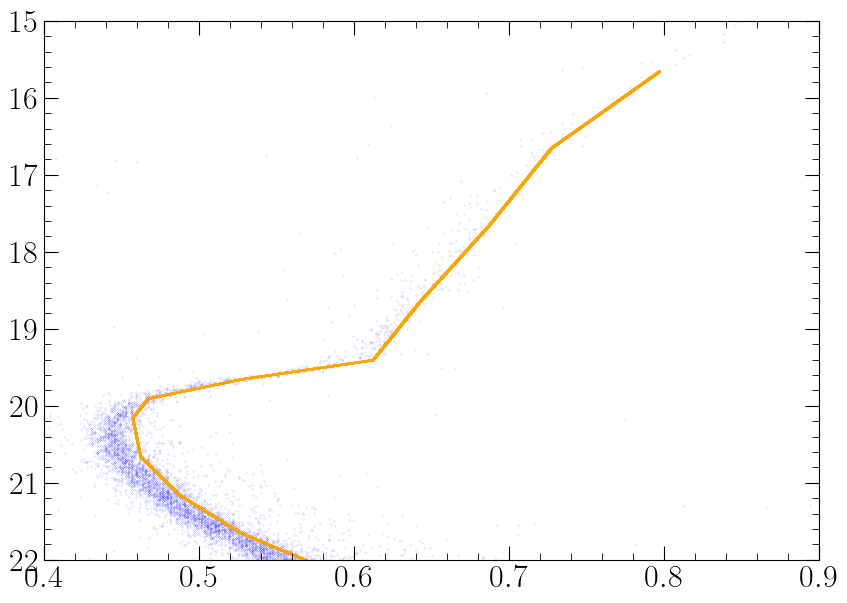

In [7]:
plt.scatter(obs_V-obs_I,obs_V,s=0.005,c='b')
V_diff=32.651
I_diff = 31.754
VI_diff=V_diff - I_diff
plt.scatter(as_V-as_I+VI_diff,as_V + V_diff,s=0.1,c='orange',alpha=0.5)
plt.ylim(15,22)
plt.xlim(0.4,0.9)
plt.gca().invert_yaxis()

In [9]:
V_SGB = 19.76
VI_SGB = 0.492
print("V for AS test = {}".format(V_SGB - V_diff))
print("I for AS test = {}".format(V_SGB - VI_SGB - (V_diff - VI_diff)))

V for AS test = -12.891000000000002
I for AS test = -12.486


V_diff = 32.651
I_diff = 31.754


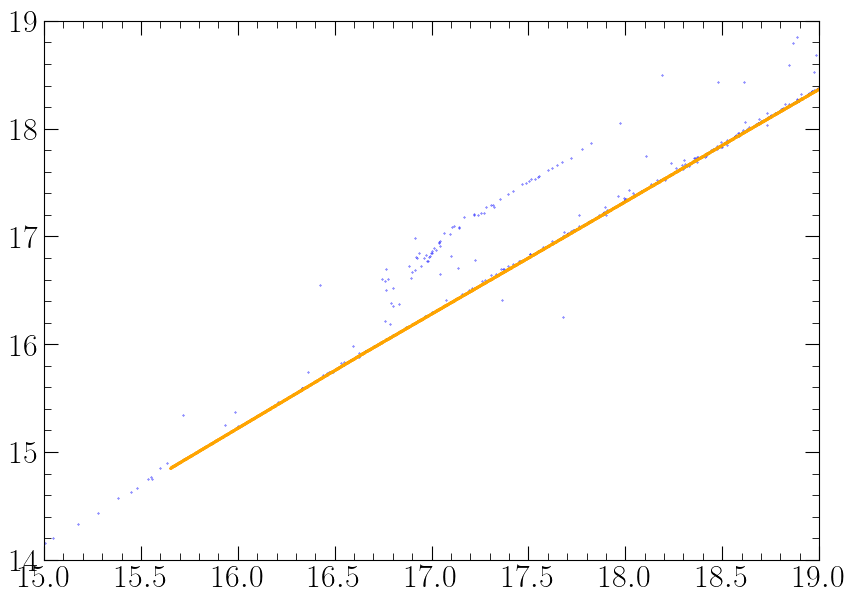

In [10]:
plt.scatter(obs_V,obs_I,s=0.1,c='b')
I_diff = V_diff-VI_diff
#VI_diff=0.737
plt.scatter(as_V+V_diff,as_I+I_diff,s=0.1,c='orange',alpha=0.5)
plt.xlim(15,19)
plt.ylim(14,19)
print("V_diff = {}".format(V_diff))
print("I_diff = {}".format(I_diff))

In [12]:
mag_cut = 2
fitstars = pd.read_csv("{}/{}_fitstars_ZPCR.dat".format(GC_path,GC_name),sep=',')
fitstars_in_range = fitstars[(fitstars['v'] >= V_SGB - mag_cut) & (fitstars['v'] <= V_SGB + mag_cut)]

In [13]:
V_long_short=18.55
I_long_short=17.60

In [15]:
print("V_max for AS test is: {}".format(max(fitstars_in_range['v'].values) - V_diff))
print("V_min for AS test is: {}".format(min(fitstars_in_range['v'].values) - V_diff))
print("I_max for AS test is: {}".format(max(fitstars_in_range['i'].values) - I_diff))
print("I_min for AS test is: {}".format(min(fitstars_in_range['i'].values) - I_diff))
print("VI_max for AS test is: {}".format(max(fitstars_in_range['vi'].values)- V_diff + I_diff))
print("VI_min for AS test is: {}".format(min(fitstars_in_range['vi'].values)- V_diff + I_diff))
print("V_short_long for AS test is: {}".format(V_long_short - V_diff))
print("I_short_long for AS test is: {}".format(I_long_short - I_diff))

V_max for AS test is: -10.891000000000002
V_min for AS test is: -14.864000000000004
I_max for AS test is: -10.489
I_min for AS test is: -14.651
VI_max for AS test is: -0.19107033127912487
VI_min for AS test is: -0.5183264443038915
V_short_long for AS test is: -14.101000000000003
I_short_long for AS test is: -14.154
